In [1]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/thesis-relation-extraction-vn

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/thesis-relation-extraction-vn


In [2]:
! pip3 install transformers

In [3]:
from encode_features import RE_DataEncoder
from Models import CNN_model

import numpy as np
import seaborn as sns
import pickle
import torch

In [6]:
with open('data/data_encoder.obj', 'rb') as f:
    Encoder=pickle.load(f)

vocab_size=Encoder.vocab_size
max_len= Encoder.max_len

X_train = np.load('data/X_train.npy')
y_train = np.load('data/y_train.npy')
X_test = np.load('data/X_test.npy')
y_test = np.load('data/y_test.npy')

sentence_emb_train=torch.load('data/sentence_emb_train_tensor.pt')
sentence_emb_test=torch.load('data/sentence_emb_test_tensor.pt')

In [4]:
from Models import CNN_model

In [7]:
cnn=CNN_model(Encoder.max_len)
cnn.build_model()

In [8]:
cnn.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 e1_position (InputLayer)    [(None, 40)]                 0         []                            
                                                                                                  
 e2_position (InputLayer)    [(None, 40)]                 0         []                            
                                                                                                  
 grammar_relation (InputLay  [(None, 40)]                 0         []                            
 er)                                                                                              
                                                                                                  
 shortest_path (InputLayer)  [(None, 40)]                 0         []                        

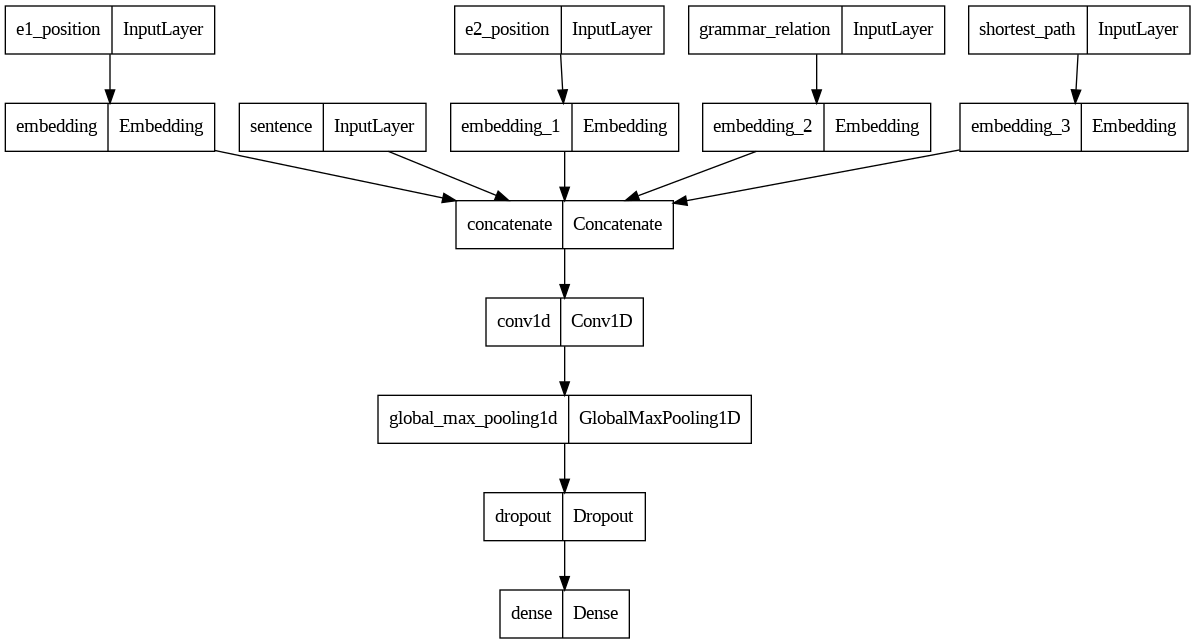

In [9]:
from keras.utils import plot_model
plot_model(cnn.model)

In [ ]:
cnn.train_model([sentence_emb_train.cpu().detach().numpy(), X_train[2], X_train[3], X_train[4], X_train[5]], y_train, epochs=3)

Epoch 1/3
250/250 [==============================] - 60s 233ms/step - loss: 1.4530 - accuracy: 0.5502
Epoch 2/3
250/250 [==============================] - 54s 218ms/step - loss: 0.8007 - accuracy: 0.7479
Epoch 3/3
250/250 [==============================] - 53s 214ms/step - loss: 0.5436 - accuracy: 0.8255


In [11]:
cnn.evaluate([sentence_emb_test.cpu().detach().numpy(), X_test[2], X_test[3], X_test[4], X_test[5]], y_test, Encoder.dict_labels)

85/85 [==============================] - 7s 82ms/step
Full classes:
                           precision    recall  f1-score   support

      Cause-Effect(e1,e2)       0.95      0.81      0.87       134
      Cause-Effect(e2,e1)       0.72      0.87      0.79       194
   Component-Whole(e1,e2)       0.74      0.74      0.74       162
   Component-Whole(e2,e1)       0.74      0.61      0.67       150
 Content-Container(e1,e2)       0.80      0.88      0.84       153
 Content-Container(e2,e1)       0.82      0.72      0.77        39
Entity-Destination(e1,e2)       0.90      0.83      0.86       291
Entity-Destination(e2,e1)       0.00      0.00      0.00         1
     Entity-Origin(e1,e2)       0.81      0.81      0.81       211
     Entity-Origin(e2,e1)       0.82      0.70      0.76        47
 Instrument-Agency(e1,e2)       0.53      0.41      0.46        22
 Instrument-Agency(e2,e1)       0.73      0.62      0.67       134
 Member-Collection(e1,e2)       0.64      0.50      0.56    

In [ ]:
cnn.save_model("DK_first_all_3ep")

In [10]:
cnn.load_model("DK_first_all_3ep")